## Forecasting Models

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("./UDEMY_TSA_FINAL/Data/airline_passengers.csv",index_col="Month",parse_dates=True)
df.index.freq="MS"
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [4]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


(None,
        Thousands of Passengers
 count               144.000000
 mean                280.298611
 std                 119.966317
 min                 104.000000
 25%                 180.000000
 50%                 265.500000
 75%                 360.500000
 max                 622.000000)

##### Train Test Split

In [5]:
train_data=df.iloc[:109]
test_data=df.iloc[108:]

#### Fitting the Model

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#holtwinters model
fitted_model=ExponentialSmoothing(train_data["Thousands of Passengers"], trend="mul",seasonal="mul",seasonal_periods=12).fit()

c:\Users\Selim\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


#### Evaluating Model 

In [7]:
test_predictions=fitted_model.forecast(36).rename("HW Forecast")

In [8]:
test_data.head(5), test_predictions.head()

(            Thousands of Passengers
 Month                              
 1958-01-01                      340
 1958-02-01                      318
 1958-03-01                      362
 1958-04-01                      348
 1958-05-01                      363,
 1958-02-01    339.142914
 1958-03-01    399.281625
 1958-04-01    394.233547
 1958-05-01    402.545191
 1958-06-01    473.128655
 Freq: MS, Name: HW Forecast, dtype: float64)

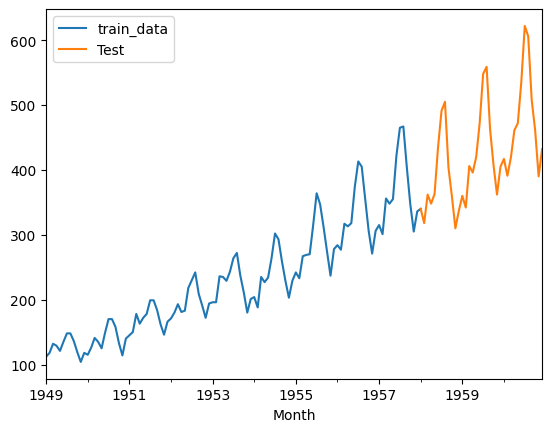

In [9]:
train_data["Thousands of Passengers"].plot(legend=True,label="train_data");
test_data["Thousands of Passengers"].plot(legend=True, label="Test");

#### plotting the prediction

<AxesSubplot:xlabel='Month'>

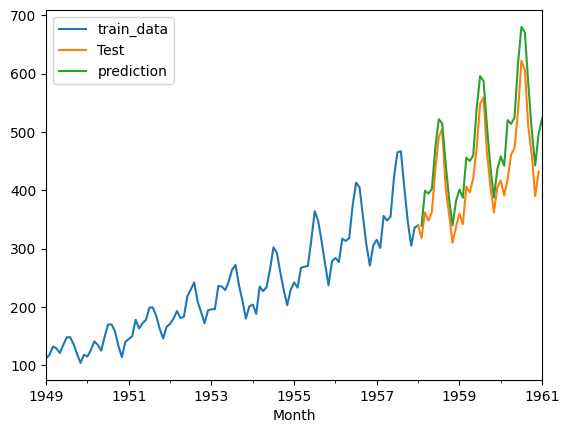

In [10]:
train_data["Thousands of Passengers"].plot(legend=True,label="train_data");
test_data["Thousands of Passengers"].plot(legend=True, label="Test");
test_predictions.plot(legend=True,label="prediction")

#### additive model

In [11]:
#holtwinters additive model
fitted_add_model=ExponentialSmoothing(train_data["Thousands of Passengers"], trend="add",seasonal="add",seasonal_periods=12).fit()

<AxesSubplot:xlabel='Month'>

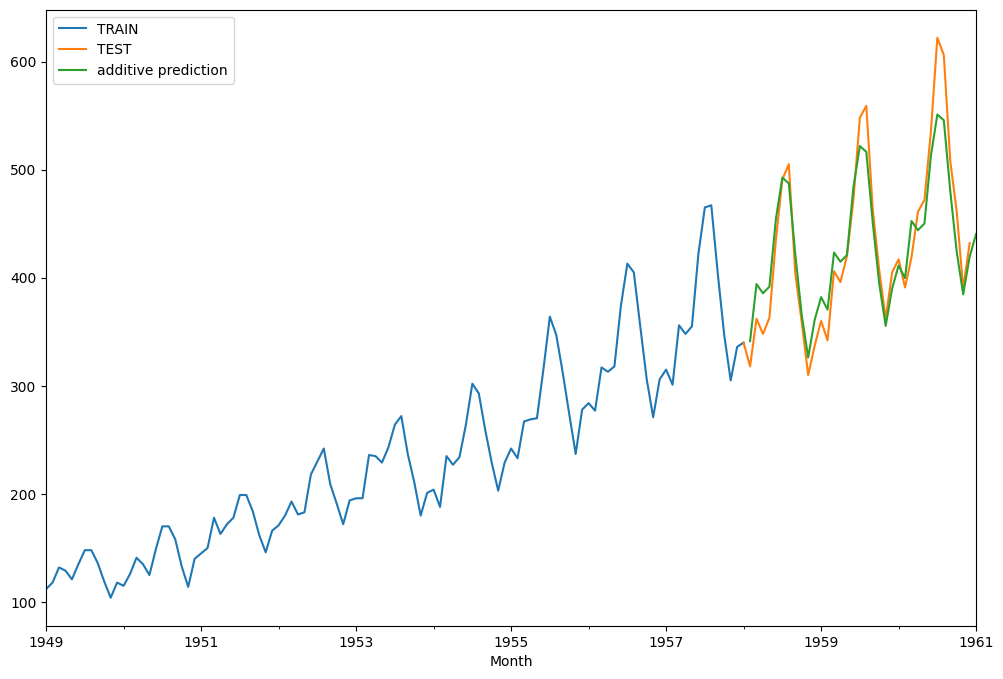

In [12]:
testadd_predictions=fitted_add_model.forecast(36).rename("HW additive model")
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
testadd_predictions.plot(legend=True,label='additive prediction')

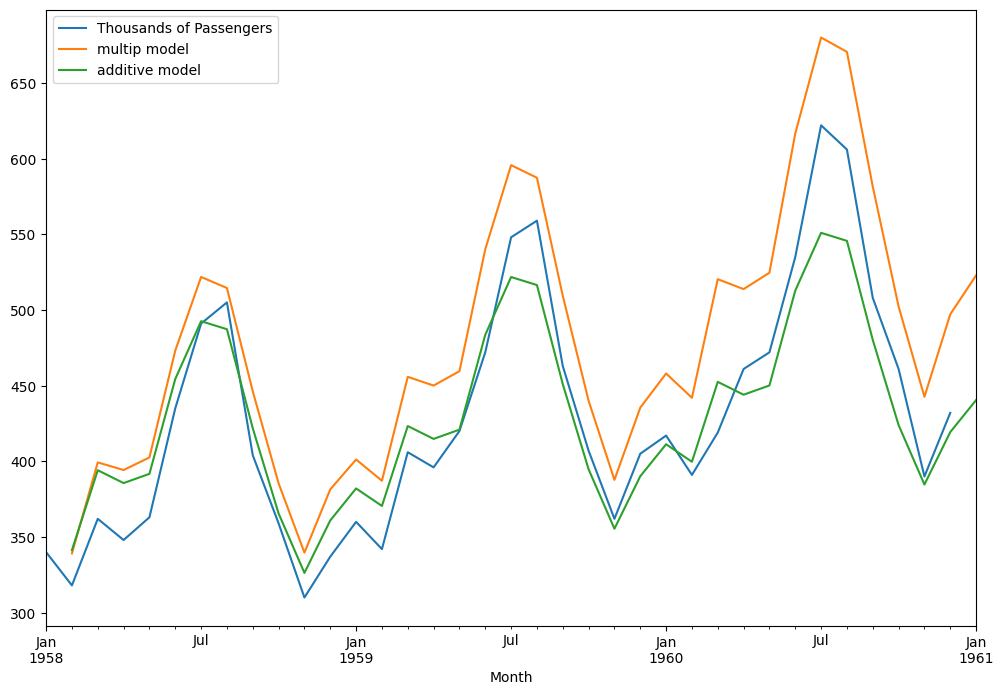

In [13]:
test_data.plot(legend=True,label="Test")
test_predictions.plot(legend=True,label="multip model")
testadd_predictions.plot(legend=True,label="additive model",figsize=(12,8));

## Evaluation Metrics

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [15]:
print(f"MAE for multip model: {mean_absolute_error(test_data,test_predictions)},  MAE for additive model: {mean_absolute_error(test_data,testadd_predictions)}")

# this shows MAE for multip model and additive model

MAE for multip model: 63.03104082299123,  MAE for additive model: 45.892139901822304


In [16]:
print(f"MSE for multip model: {mean_squared_error(test_data,test_predictions)},  MSE for additive model: {mean_squared_error(test_data,testadd_predictions)}")

MSE for multip model: 5614.236501157957,  MSE for additive model: 3083.0244352920536


In [17]:
print(f"RMSE for multip model: {np.sqrt(mean_squared_error(test_data,test_predictions))},  RMSE for additive model: {np.sqrt(mean_squared_error(test_data,testadd_predictions))}")

RMSE for multip model: 74.92820898138402,  RMSE for additive model: 55.524989286735156


In [18]:
print(f"MAPE for multip model: {mean_absolute_percentage_error(test_data,test_predictions)}, MAPE for additive model: {mean_absolute_percentage_error(test_data,testadd_predictions)}")

MAPE for multip model: 0.15264672599899007, MAPE for additive model: 0.10709747313309931


In [19]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


##### this shows additive model works better

## Foreasting into Future

In [20]:
final_model=ExponentialSmoothing(df["Thousands of Passengers"],trend="mul",seasonal="mul",seasonal_periods=12).fit()

c:\Users\Selim\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [21]:
forecast_pred=final_model.forecast(36)

<AxesSubplot:xlabel='Month'>

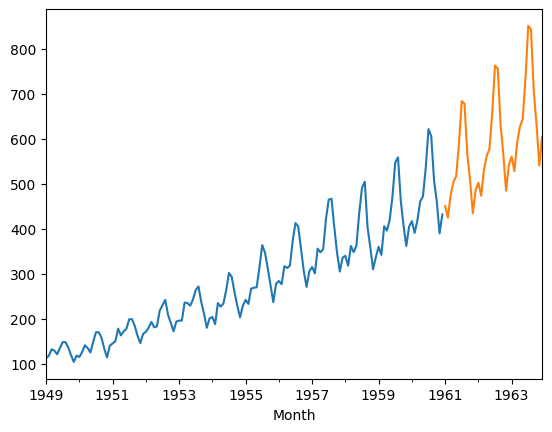

In [22]:
df["Thousands of Passengers"].plot()
forecast_pred.plot()

### Stationarity

In [79]:
df2=pd.read_csv("./UDEMY_TSA_FINAL/Data/samples.csv",index_col=0,parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


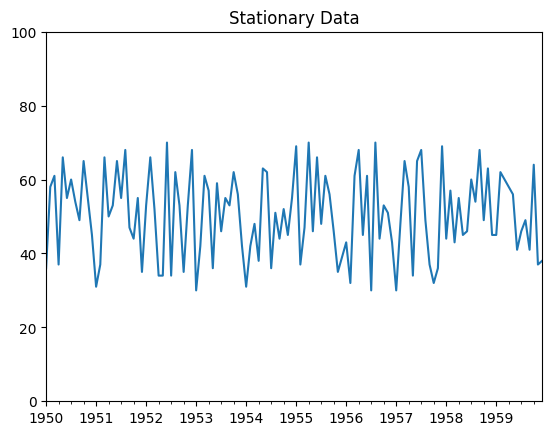

In [24]:
df2["a"].plot(title="Stationary Data",ylim=[0,100]);

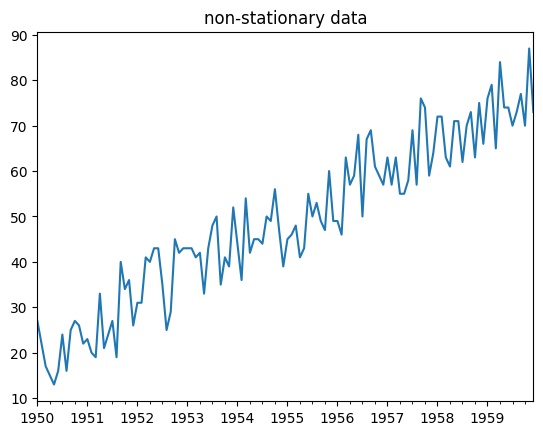

In [25]:
df2["b"].plot(title="non-stationary data");

### Differecing

In [26]:
from statsmodels.tsa.statespace.tools import diff

<AxesSubplot:title={'center':'first term difference data'}>

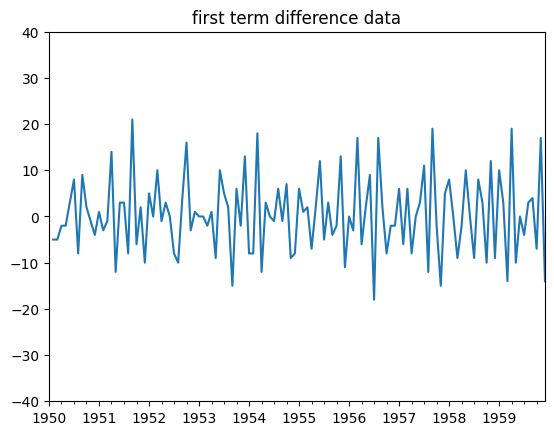

In [27]:
df2["d1"]=diff(df2["b"],k_diff=1)# first term difference
#this makes b is stationary
df2["d1"].plot(title="first term difference data",ylim=[-40,40])

### Forcasting with differencing 

In [28]:
df2[["b"]].tail(3)

,b
1959-10-01,70
1959-11-01,87
1959-12-01,73


In [29]:
idx=pd.date_range("1960-01-01",periods=5,freq="MS")
z=pd.DataFrame([7,-2,5,-1,12],index=idx,columns=["Fcast"])
z

,Fcast
1960-01-01,7
1960-02-01,-2
1960-03-01,5
1960-04-01,-1
1960-05-01,12


In [30]:
z["forecast"]=df2["b"].iloc[-1]+z["Fcast"].cumsum()
z


,Fcast,forecast
1960-01-01,7,80
1960-02-01,-2,78
1960-03-01,5,83
1960-04-01,-1,82
1960-05-01,12,94


<AxesSubplot:>

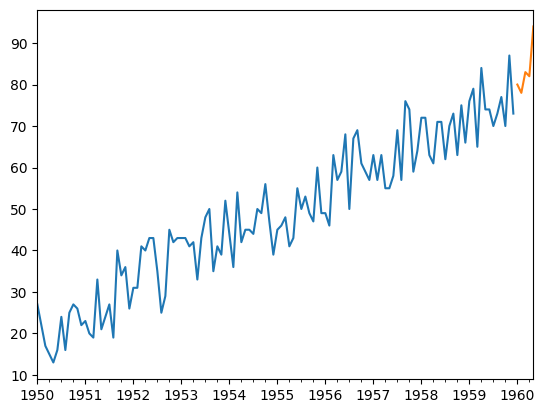

In [31]:
df2["b"].plot()
z["forecast"].plot()

### Second Order Differencing

<AxesSubplot:title={'center':'first order diff'}>

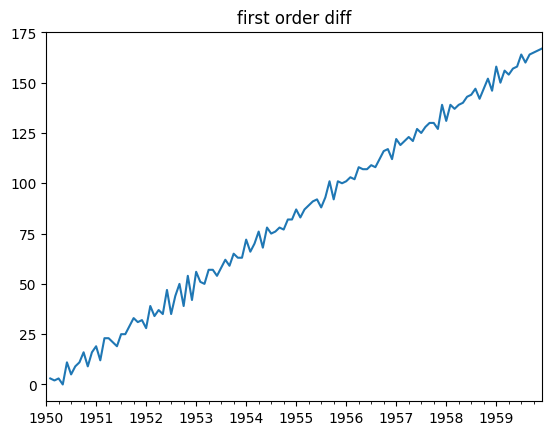

In [32]:
df2["d1c"]=df2["c"].diff()
df2["d1c"].plot(title="first order diff")

In [33]:
df2["d2c"]=df2["c"].diff().diff()
df2[["c","d1c","d2c"]].head()

,c,d1c,d2c
1950-01-01,0,NaN,NaN
1950-02-01,3,3.0,NaN
1950-03-01,5,2.0,-1.0
1950-04-01,8,3.0,1.0
1950-05-01,8,0.0,-3.0


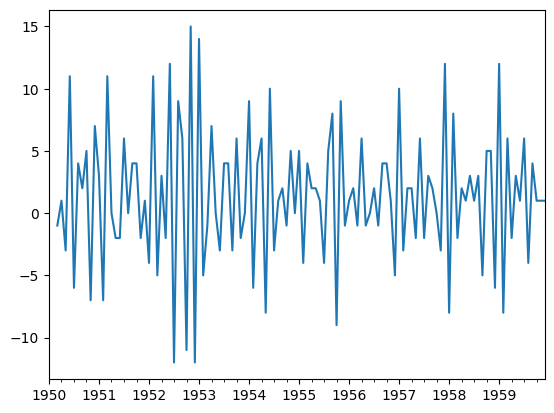

In [34]:
df2["d2c"].plot();

### forcasting on 2nd order diff

In [35]:
idx=pd.date_range("1960-01-01",periods=5,freq="MS")
z=pd.DataFrame([7,-2,5,-1,12],index=idx,columns=["Fcast"])
z

,Fcast
1960-01-01,7
1960-02-01,-2
1960-03-01,5
1960-04-01,-1
1960-05-01,12


In [36]:
forecast=[]

#getting most recent values from training set

v2,v1 = df2["c"].iloc[-2:]
v1,v2

for i in z["Fcast"]:
    newval=i+2*v1-v2
    forecast.append(newval)
    v2,v1=v1,newval

z["forecast"]=forecast
z

,Fcast,forecast
1960-01-01,7,10174
1960-02-01,-2,10346
1960-03-01,5,10523
1960-04-01,-1,10699
1960-05-01,12,10887


In [37]:
z["firstdiff"]=(df2["c"].iloc[-1]-df2["c"].iloc[-2])+z["Fcast"].cumsum()

In [38]:
z["forecast"]=df2["c"].iloc[-1]+z["firstdiff"].cumsum()
z

,Fcast,forecast,firstdiff
1960-01-01,7,10174,174
1960-02-01,-2,10346,172
1960-03-01,5,10523,177
1960-04-01,-1,10699,176
1960-05-01,12,10887,188


<AxesSubplot:>

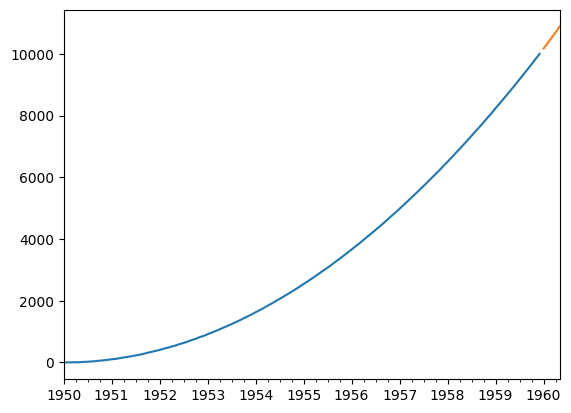

In [39]:
df2["c"].plot()

z["forecast"].plot()

<AxesSubplot:>

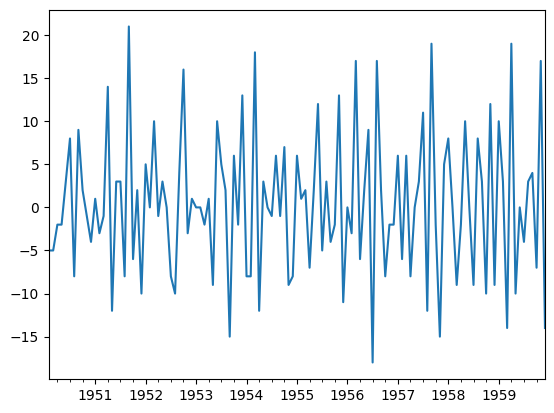

In [40]:
diff(df2["b"],k_diff=1).plot()

In [41]:
diff(df2['b'],k_diff=0,k_seasonal_diff=1,seasonal_periods=12)

1951-01-01    -4.0
1951-02-01    -2.0
1951-03-01     2.0
1951-04-01    18.0
1951-05-01     8.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01     7.0
1959-11-01    12.0
1959-12-01     7.0
Name: b, Length: 108, dtype: float64

## ACF and PACF

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [42]:
df1=pd.read_csv("./UDEMY_TSA_FINAL/Data/airline_passengers.csv",index_col=0,parse_dates=True)

In [43]:
df.index.freq="MS"

In [44]:
df2=pd.read_csv("./UDEMY_TSA_FINAL/Data/DailyTotalFemaleBirths.csv",index_col=0,parse_dates=True)

In [46]:
df2.index.freq="D"

In [50]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [51]:
import warnings
warnings.filterwarnings("ignore")

## 1D Autocivariance

In [53]:
df=pd.DataFrame({"a":[13,5,11,12,9]})
arr=acovf(df["a"])
arr

array([ 8. , -4. , -1.6,  2.2, -0.6])

In [54]:
# unbiased autocovariance
arr2=acovf(df["a"],unbiased=True)
arr2

array([ 8.        , -5.        , -2.66666667,  5.5       , -3.        ])

In [57]:
arr3=acf(df["a"])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [59]:
import matplotlib.pyplot as plt

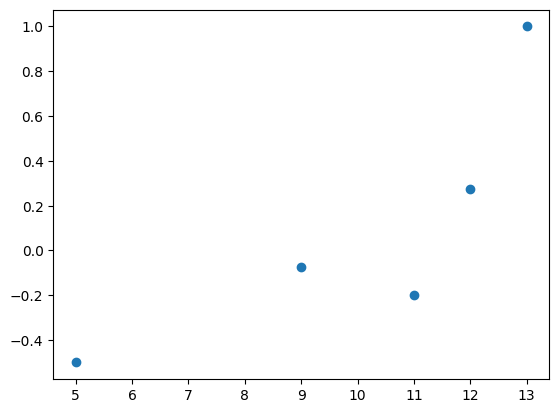

In [65]:
plt.scatter(df["a"],arr3)
#plt.plot(df)

### Partial AutoCorrelation

In [68]:
arr4=pacf_yw(df["a"],nlags=4,method="mle")
arr4

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [73]:
arr5=pacf_yw(df["a"],nlags=4)
arr5

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [75]:
#partial autocorrelation with OLS
arr6=pacf_ols(df["a"],nlags=4)
arr6

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [76]:
acf(df["a"])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

### Plotting

In [78]:
from pandas.plotting import lag_plot

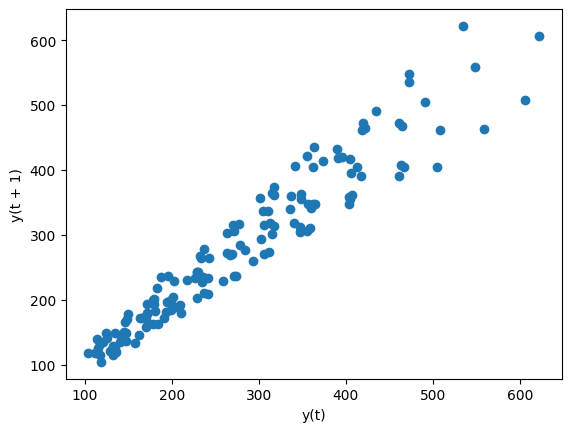

In [82]:
lag_plot(df1["Thousands of Passengers"]);

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

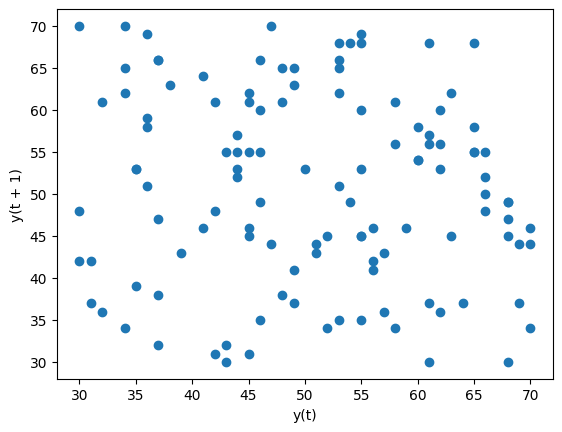

In [90]:
lag_plot(df2["a"])

### ACF plots

In [91]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [92]:
acf(df2["a"])

array([ 1.        , -0.09957214, -0.10975926,  0.00666123, -0.08166141,
       -0.04170294, -0.07568677,  0.03275281,  0.00576849, -0.08997   ,
        0.08504198, -0.10293649,  0.06922324, -0.07127265,  0.04939512,
        0.13211306, -0.02721581, -0.13268712, -0.06525509, -0.15815485,
        0.09481692])

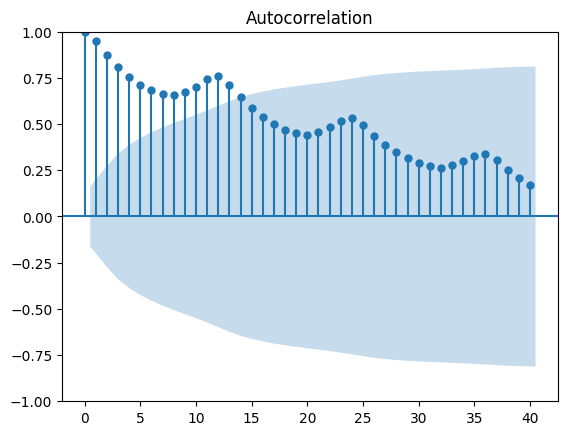

In [97]:
lags=40
plot_acf(df1,lags=lags);

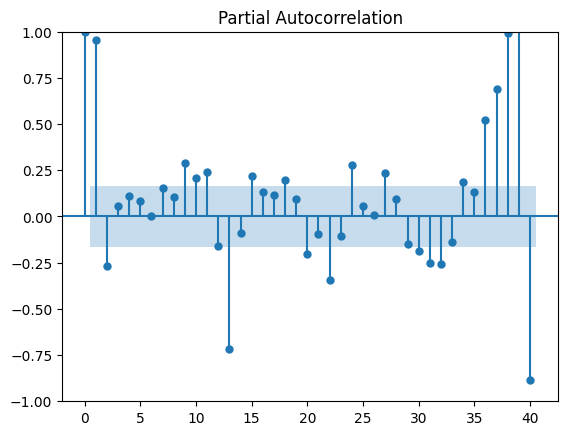

In [99]:
lags=40
plot_pacf(df1,lags=lags);

<AxesSubplot:xlabel='Month'>

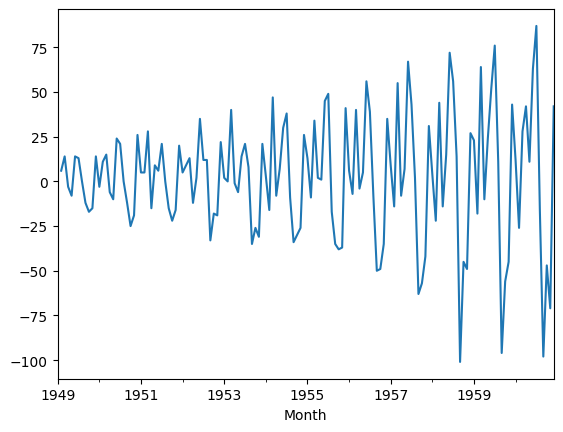

In [100]:
#applying first difference
df1["d1"]=diff(df1["Thousands of Passengers"],k_diff=1)
df1["d1"].plot()

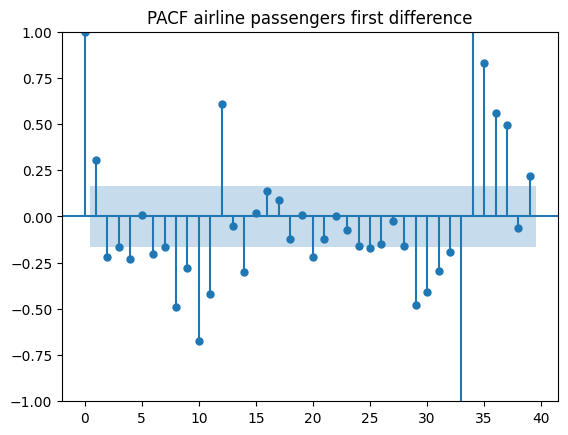

In [102]:
title="PACF airline passengers first difference"
lags=40
plot_pacf(df1["d1"].dropna(),title=title,lags=np.arange(lags));

#### Plot Resizing

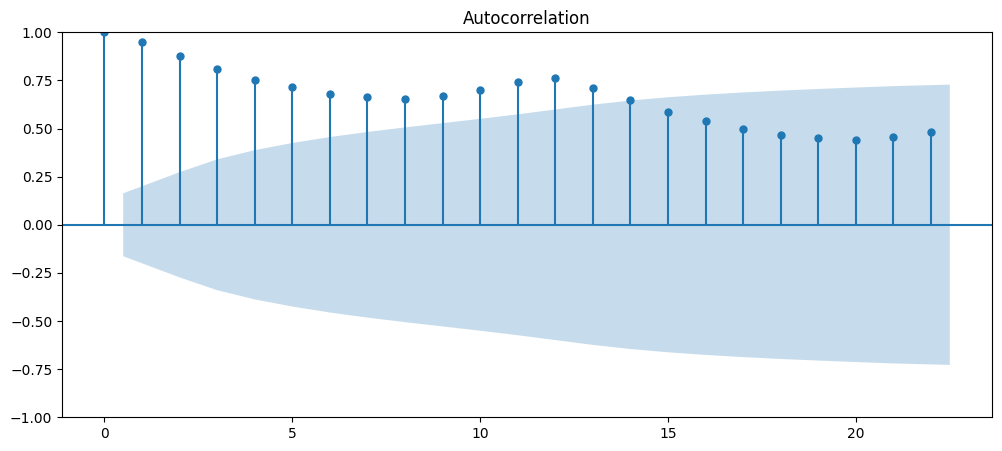

In [104]:
fig, ax= plt.subplots(figsize=(12,5))
plot_acf(df1["Thousands of Passengers"],ax=ax);